In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker

data_dir = path.join("Data","wikt")
labels = ["wiktionary", "paiceHusk", "krovetz", "sStripping", "porter2", "lovins"]

### Cluster Size Distribution

In [2]:
wikt_distribution = np.loadtxt(path.join(data_dir, "wikt_distribution.csv"))
paiceHusk_distribution = np.loadtxt(path.join(data_dir, "paiceHusk_distribution.csv"))
krovetz_distribution = np.loadtxt(path.join(data_dir, "krovetz_distribution.csv"))
sStripping_distribution = np.loadtxt(path.join(data_dir, "sStripping_distribution.csv"))
porter2_distribution = np.loadtxt(path.join(data_dir, "porter2_distribution.csv"))
lovins_distribution = np.loadtxt(path.join(data_dir, "lovins_distribution.csv"))

In [3]:
data = {
    "wiktionary": wikt_distribution
}
wikt = pd.DataFrame(data=data)
wikt = wikt.reset_index().melt(id_vars=["index"])
wikt = wikt.rename(columns={"variable":"stemmer"})

data = {
    "paiceHusk" : paiceHusk_distribution
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_distribution
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_distribution
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_distribution
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_distribution
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


cluster_sizes = pd.concat([wikt,paiceHusk,krovetz,sStripping,porter2,lovins])
display(cluster_sizes)

,index,stemmer,value
0,0,wiktionary,1.0
1,1,wiktionary,1.0
2,2,wiktionary,5.0
3,3,wiktionary,1.0
4,4,wiktionary,1.0
...,...,...,...
70610,70610,lovins,1.0
70611,70611,lovins,1.0
70612,70612,lovins,3.0
70613,70613,lovins,1.0


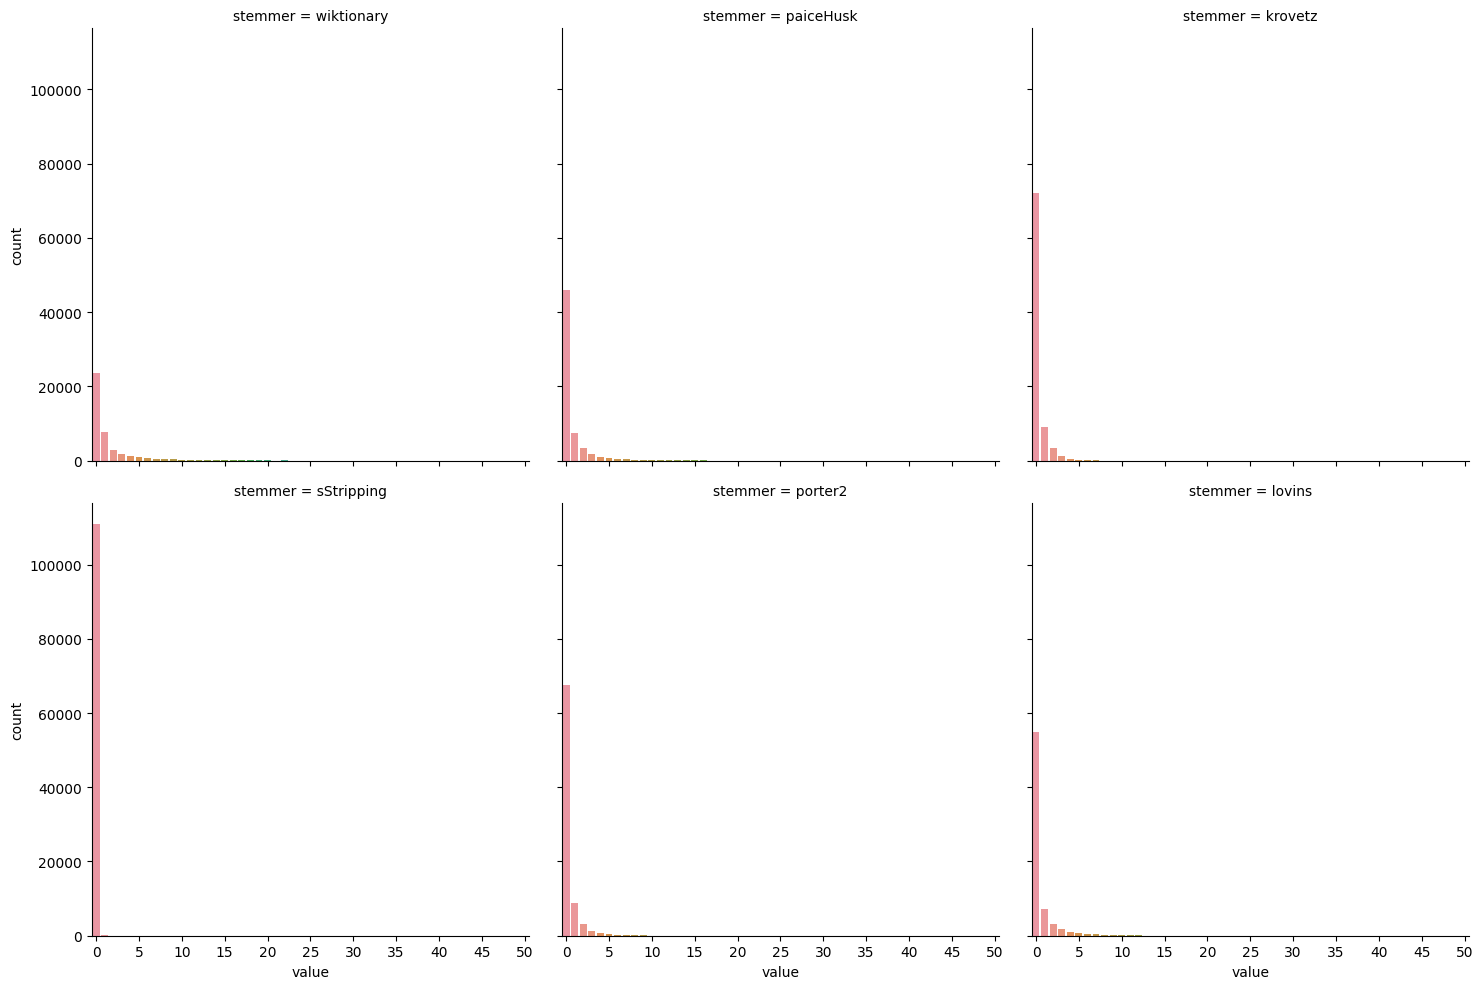

In [4]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

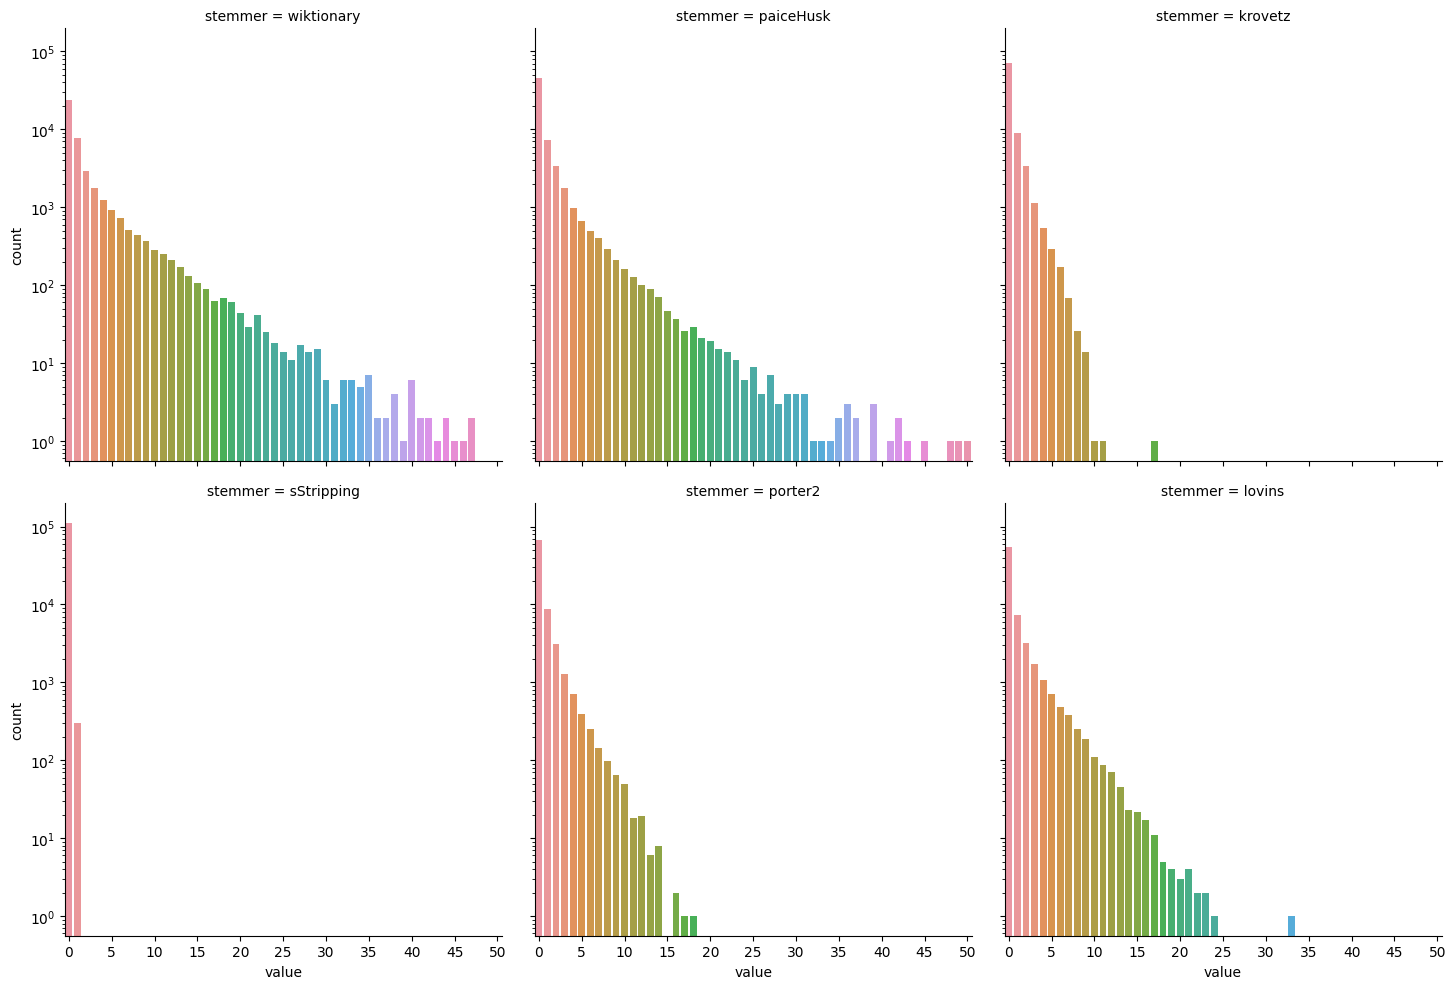

In [5]:
axes = sns.catplot(data=cluster_sizes, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.set_yscale("log")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Number of Clusters

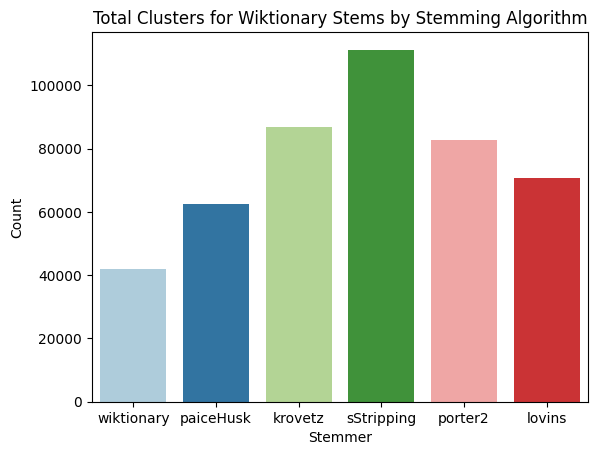

In [6]:
data = [len(wikt_distribution),len(paiceHusk_distribution),len(krovetz_distribution),len(sStripping_distribution),len(porter2_distribution),len(lovins_distribution)]
sns.barplot(x=labels, y=data, palette=sns.color_palette("Paired"))
plt.title("Total Clusters for Wiktionary Stems by Stemming Algorithm")
plt.xlabel("Stemmer")
plt.ylabel("Count")
plt.show()

### Word Distances

In [7]:
paiceHusk_word_distances = np.loadtxt(path.join(data_dir, "paiceHusk_word_distances.csv"))
krovetz_word_distances = np.loadtxt(path.join(data_dir, "krovetz_word_distances.csv"))
sStripping_word_distances = np.loadtxt(path.join(data_dir, "sStripping_word_distances.csv"))
porter2_word_distances = np.loadtxt(path.join(data_dir, "porter2_word_distances.csv"))
lovins_word_distances = np.loadtxt(path.join(data_dir, "lovins_word_distances.csv"))

In [8]:
data = {
    "paiceHusk" : paiceHusk_word_distances
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_word_distances
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_word_distances
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_word_distances
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_word_distances
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})


word_distances = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(word_distances)

,index,stemmer,value
0,0,paiceHusk,5.0
1,1,paiceHusk,3.0
2,2,paiceHusk,0.0
3,3,paiceHusk,2.0
4,4,paiceHusk,2.0
...,...,...,...
111501,111501,lovins,1.0
111502,111502,lovins,1.0
111503,111503,lovins,1.0
111504,111504,lovins,1.0


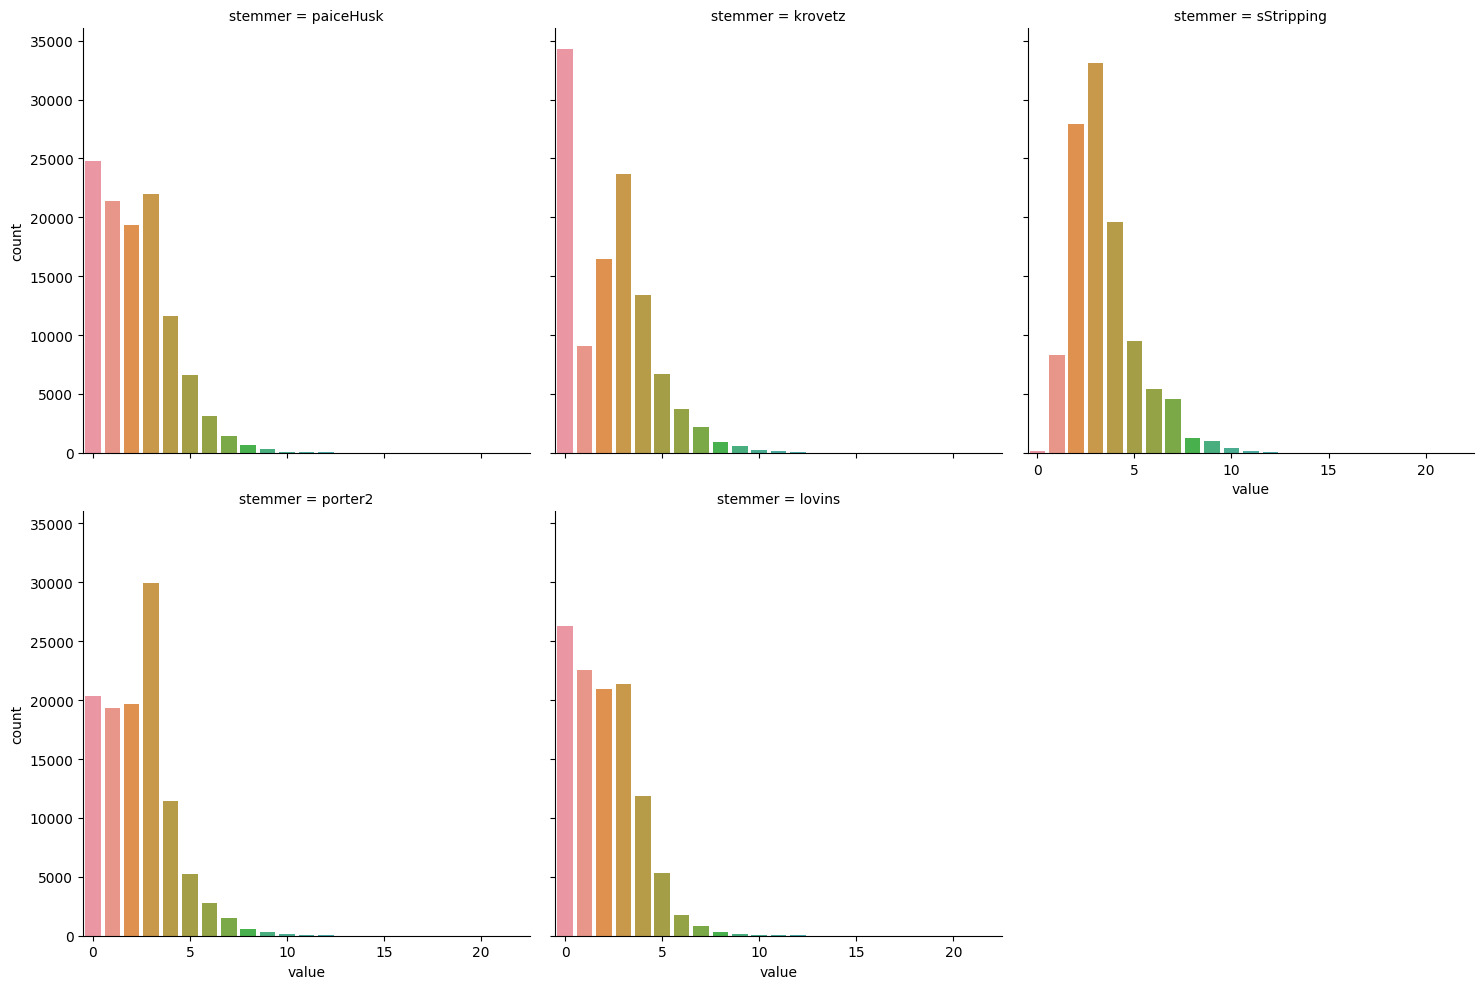

In [9]:
axes = sns.catplot(data=word_distances, kind="count", x="value", col="stemmer", col_wrap=3)
for ax in axes.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Average Cluster F-Measure

In [10]:
paiceHusk_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_before_cluster_fmeasures.csv"))
krovetz_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_before_cluster_fmeasures.csv"))
sStripping_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_before_cluster_fmeasures.csv"))
porter2_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_before_cluster_fmeasures.csv"))
lovins_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_before_cluster_fmeasures.csv"))

before = [paiceHusk_before_cluster_fmeasures, krovetz_before_cluster_fmeasures, sStripping_before_cluster_fmeasures, porter2_before_cluster_fmeasures, lovins_before_cluster_fmeasures]

In [11]:
paiceHusk_after_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_after_cluster_fmeasures.csv"))
krovetz_after_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_after_cluster_fmeasures.csv"))
sStripping_after_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_after_cluster_fmeasures.csv"))
porter2_after_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_after_cluster_fmeasures.csv"))
lovins_after_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_after_cluster_fmeasures.csv"))

after = [paiceHusk_after_cluster_fmeasures, krovetz_after_cluster_fmeasures, sStripping_after_cluster_fmeasures, porter2_after_cluster_fmeasures, lovins_after_cluster_fmeasures]

In [12]:
averages = list()
for stemmer in before:
    averages.append(stemmer.mean())
for stemmer in after:
    averages.append(stemmer.mean())

data = {
    "Stemmer" : labels[1:]*2,
    "With/Without" : ["With Singles"]*5 + ["Without Singles"]*5,
    "F-Measure" : averages
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,With/Without,F-Measure
0,paiceHusk,With Singles,0.615709
1,krovetz,With Singles,0.554588
2,sStripping,With Singles,0.464913
3,porter2,With Singles,0.548461
4,lovins,With Singles,0.583960
5,paiceHusk,Without Singles,0.691604
6,krovetz,Without Singles,0.659083
7,sStripping,Without Singles,0.358536
8,porter2,Without Singles,0.624011
9,lovins,Without Singles,0.648472


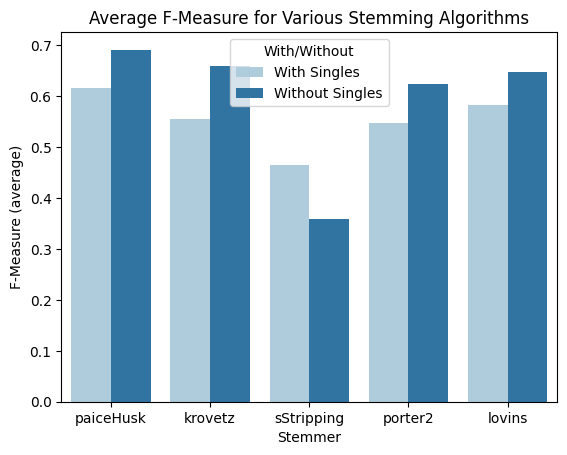

In [13]:
sns.barplot(x="Stemmer", y="F-Measure", hue="With/Without", data=average_fmeasures, palette=sns.color_palette("Paired"))
plt.title("Average F-Measure for Various Stemming Algorithms")
plt.ylabel("F-Measure (average)")
plt.show()

### Cluster F-Measures (with clusters of size 1)

In [14]:
data = {
    "paiceHusk" : paiceHusk_before_cluster_fmeasures
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_before_cluster_fmeasures
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_before_cluster_fmeasures
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_before_cluster_fmeasures
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_before_cluster_fmeasures
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})

In [15]:
fmeasures_before = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(fmeasures_before)

,index,stemmer,value
0,0,paiceHusk,1.000000
1,1,paiceHusk,1.000000
2,2,paiceHusk,0.333333
3,3,paiceHusk,0.571429
4,4,paiceHusk,0.333333
...,...,...,...
70610,70610,lovins,1.000000
70611,70611,lovins,1.000000
70612,70612,lovins,1.000000
70613,70613,lovins,1.000000


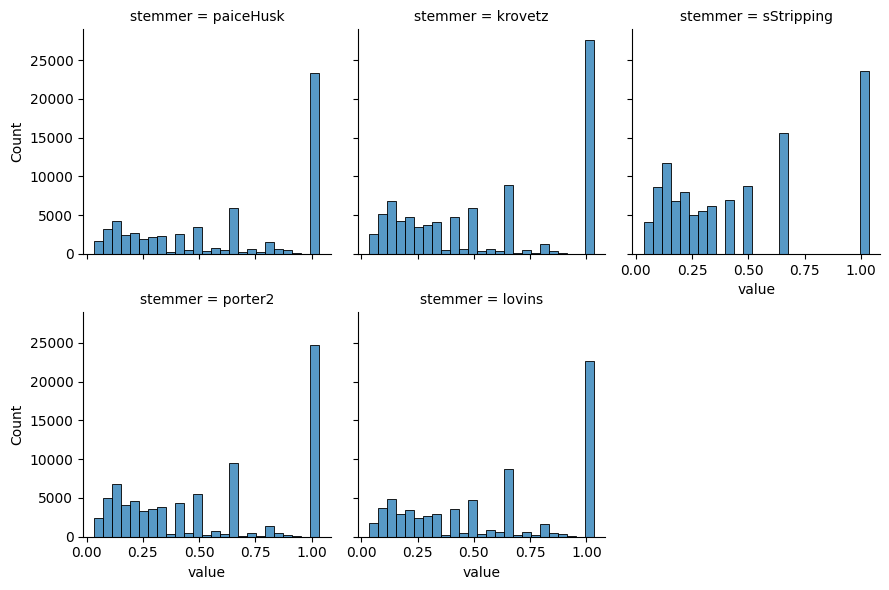

In [36]:
g = sns.FacetGrid(fmeasures_before, col="stemmer", col_wrap=3)
g.map_dataframe(sns.histplot, x="value", binwidth=0.04)

### Cluster F-Measures (without clusters of size 1)

In [37]:
data = {
    "paiceHusk" : paiceHusk_after_cluster_fmeasures
}
paiceHusk = pd.DataFrame(data=data)
paiceHusk = paiceHusk.reset_index().melt(id_vars=["index"])
paiceHusk = paiceHusk.rename(columns={"variable":"stemmer"})

data = {
    "krovetz" : krovetz_after_cluster_fmeasures
}
krovetz = pd.DataFrame(data=data)
krovetz = krovetz.reset_index().melt(id_vars=["index"])
krovetz = krovetz.rename(columns={"variable":"stemmer"})

data={
    "sStripping" : sStripping_after_cluster_fmeasures
}
sStripping = pd.DataFrame(data=data)
sStripping = sStripping.reset_index().melt(id_vars=["index"])
sStripping = sStripping.rename(columns={"variable":"stemmer"})

data={
    "porter2" : porter2_after_cluster_fmeasures
}
porter2 = pd.DataFrame(data=data)
porter2 = porter2.reset_index().melt(id_vars=["index"])
porter2 = porter2.rename(columns={"variable":"stemmer"})

data={
    "lovins" : lovins_after_cluster_fmeasures
}
lovins = pd.DataFrame(data=data)
lovins = lovins.reset_index().melt(id_vars=["index"])
lovins = lovins.rename(columns={"variable":"stemmer"})

In [38]:
fmeasures_after = pd.concat([paiceHusk,krovetz,sStripping,porter2,lovins])
display(fmeasures_after)

,index,stemmer,value
0,0,paiceHusk,0.571429
1,1,paiceHusk,0.625000
2,2,paiceHusk,0.947368
3,3,paiceHusk,0.444444
4,4,paiceHusk,0.625000
...,...,...,...
15638,15638,lovins,1.000000
15639,15639,lovins,0.800000
15640,15640,lovins,1.000000
15641,15641,lovins,1.000000


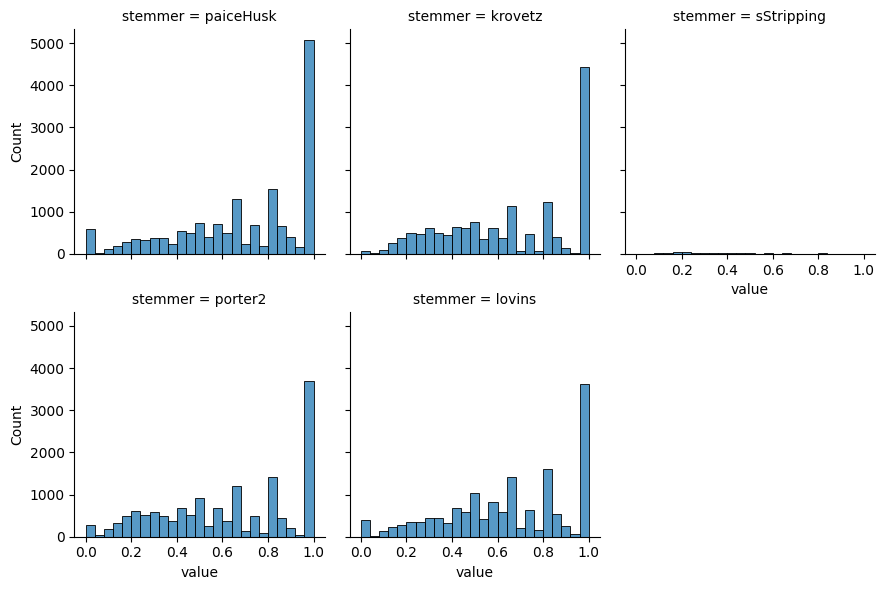

In [39]:
g = sns.FacetGrid(fmeasures_after, col="stemmer", col_wrap=3)
g.map_dataframe(sns.histplot, x="value", binwidth=0.04)